## Overview
Automated methods to detect and classify human diseases from medical images.

## Data Description
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

You can find the dataset here.

## Files
* test
1. 1. NORMAL
2. 2. PNEUMONIA
* train
1. 1. NORMAL
2. 2. PNEUMONIA
* val
1. 1. NORMAL
2. 2. PNEUMONIA

## So let’s begin here…

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

In [12]:
mainDIR = os.listdir('../input/chest-xray-pneumonia/chest_xray')
print(mainDIR)

['test', 'val', '__MACOSX', 'train', 'chest_xray']


## Load Data

In [13]:
train_folder= '../input/chest-xray-pneumonia/chest_xray/train/'
val_folder = '../input/chest-xray-pneumonia/chest_xray/val/'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test/'

### Train Data

In [14]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-1134-0001.jpeg
pneumonia picture title: person1395_bacteria_3544.jpeg


Text(0.5, 1.0, 'Pneumonia')

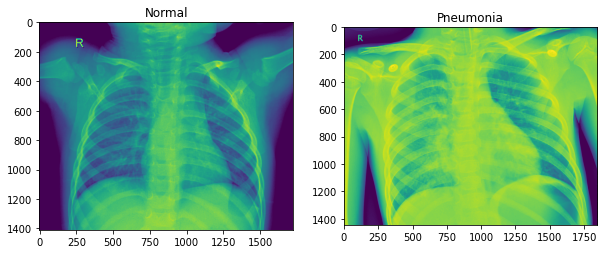

In [15]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

## Defining Model

In [16]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

## Compile Model

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

## Fit Model

In [20]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 193s 1s/step - loss: 0.3492 - accuracy: 0.8507 - val_loss: 0.8876 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 189s 1s/step - loss: 0.2295 - accuracy: 0.9055 - val_loss: 0.2730 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 190s 1s/step - loss: 0.2103 - accuracy: 0.9189 - val_loss: 0.6476 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 188s 1s/step - loss: 0.1868 - accuracy: 0.9241 - val_loss: 0.4832 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 189s 1s/step - loss: 0.1731 - accuracy: 0.9317 - val_loss: 0.9923 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 190s 1s/step - loss: 0.1655 - accuracy: 0.9316 - val_loss: 0.7302 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 190s 1s/step - loss: 0.1638 - accuracy: 0.9383 - val_loss: 0.3014 - val_accuracy: 0.8125

## Evaluate Model

In [21]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

### Accuracy

In [22]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 89.11770582199097 %


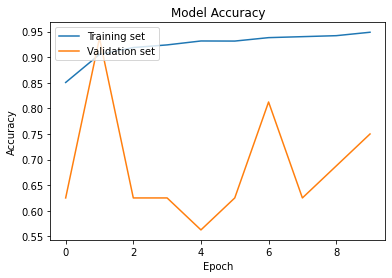

In [23]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

### Loss

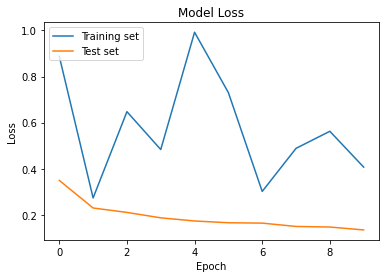

In [24]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()